# Исследование объявлений о продаже квартир

## Описание проекта

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо провести первичный исследовательский анализ данных. Посмотреть на описательную статистику и графики для каждого параметра. Определить нетипичные значения.

Это поможет в будущем построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах(м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Содержание

1. Файл с данными, общая информация.
2. Предобработка данных.
3. Добавление в таблицу доп.столбцов.
4. Исследовательский анализ данных.
5. Общие выводы. 

## Основные гипотезы

- Цена квартры зависит от площади и числа комнат (прямая зависимость), удаленности от центра (обратная зависимость).
- Цена квартиры зависит от того, на каком этаже расположена квартира (первые и последние этажи обычно дешевле).
- Цена квартиры будет отличаться в зависимости от дня недели, месяца и года размещения объявления на сайте.
- Цена квартир в Санкт-Петербурге выше, чем в близлежащих небольших городах.
- Средние показатели для центра города будут отличаться от средних генеральной совокупности.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [264]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
data_flats=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data_flats.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,1.3e+07,3.35e+06,5.196e+06,6.49e+07,1e+07
total_area,108,40.4,56,159,100
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,NaN,NaN,NaN,3.03
floors_total,16,11,5,14,14
living_area,51,18.6,34.3,NaN,32
floor,8,1,4,9,13
is_apartment,NaN,NaN,NaN,NaN,NaN


In [266]:
data_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В выборке 23699 наблюдений. Типы переменных: булевы значения - 2 шт., вещественные числа - 14 шт., целые числа - 3 шт., текстовые - 3 шт. Есть пропущенные значения. 

Далее проверим пропущенные значения, заполним их там, где это возможно. Изменим типы некоторых переменных на более корректные. Преобразуем единицы измерения для дальнейшего анализа данных.

### Шаг 2. Предобработка данных

In [267]:
#Подсчет пропущенных значений в каждом столбце
data_flats.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Анализ и замена пропущенных значений

ceiling_height - высота потолков (м) - 9195 пропусков (39% от выборки). По какой-то причине продавец не смог или не захотел предоставить эту информацию, возможно, потому что показатели были не самыми привлекательными. Но этого мы точно сказать не можем, оставим пропуски.

floors_total - всего этажей в доме - 86 пропусков (менее 1% от выборки). При обзоре этих строк, явных зависимостей пропусков от значений в других столбцах не наблюдается. Оставим пропуски.

In [268]:
#Обзор строк, для которых значение 'floors_total' пропущено
data_flats[data_flats['living_area'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


living_area - жилая площадь в квадратных метрах - 1903 пропусков (8% от выборки). Найдем ср.знач. доли жилой площади в квартире по генеральной совокупности. Заполним пропущенные значения путем умножения этого значения на площадь квартиры. 

In [269]:
#Доля жилой от общей площади
part_livspace=[]
part_livspace=data_flats['living_area']/data_flats['total_area']
part_livspace_mean=part_livspace.mean()
print('Ср.знач. доли жилой площади в квартире:', part_livspace_mean)

#Замена пропущенных значений
data_flats['living_area']=data_flats['living_area'].fillna(data_flats['total_area']*part_livspace_mean)
#Кол-во пропущенных значений после замены
print('Кол-во пропущенных значений после замены:', data_flats['living_area'].isnull().sum())

Ср.знач. доли жилой площади в квартире: 0.5647655216993234
Кол-во пропущенных значений после замены: 0


is_apartment - апартаменты (булев тип) - 20924 пропусков (88% от выборки). Скорее всего в пропущенных значениях в основном окажутся квартиры не относящиеся к апартаментам, но мы не можем это утверждать. В заполненных значениях есть и False и True. Оставим пропуски. 

In [270]:
#Обзор значений 'is_apartment'
data_flats['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

kitchen_area - площадь кухни в квадратных метрах - 2278 пропусков (10% от выборки). Найдем ср.знач. доли кухни в общей площади квартиры по генеральной совокупности. Заполним пропущенные значения путем умножения этого значения на площадь квартиры. 

In [271]:
#Доля кухни в общей площади квартиры
part_kitchen_area=[]
part_kitchen=data_flats['kitchen_area']/data_flats['total_area']
part_kitchen_mean=part_kitchen.mean()
print('Ср.знач. доли кухни в общей площади квартиры:', part_kitchen_mean)

#Замена пропущенных значений
data_flats['kitchen_area']=data_flats['kitchen_area'].fillna(data_flats['total_area']*part_kitchen_mean)
#Кол-во пропущенных значений после замены
print('Кол-во пропущенных значений после замены:', data_flats['kitchen_area'].isnull().sum())

Ср.знач. доли кухни в общей площади квартиры: 0.1873547387717406
Кол-во пропущенных значений после замены: 0


balcony - число балконов - 11519 пропусков (49% от выборки). Если человек не указал число балконов — скорее всего, их нет. Заменим пропущенные значения на 0.

In [272]:
#Замена пропущенных значений 'balcony'
data_flats['balcony']=data_flats['balcony'].fillna(0)
#Кол-во пропущенных значений после замены
print('Кол-во пропущенных значений после замены:', data_flats['balcony'].isnull().sum())

Кол-во пропущенных значений после замены: 0


locality_name - название населённого пункта - 49 пропусков (менее 1%). Не можем определить, оставим пропуски. 

airports_nearest - расстояние до ближайшего аэропорта в метрах - 5542 пропусков (23% от выборки). Скорее всего, если расстояние до аэропорта не указано - он далеко. Но замена пропусков на максимальное значение, так же как и замена на среднее может привести к искажению результатов. Оставим пропуски.

cityCenters_nearest  — расстояние до центра города (м) - 5519 пропусков (23% от выборки). Аналогично пропускам в переменной airports_nearest.

parks_around3000 - число парков в радиусе 3 км - 5518 пропусков (23% от выборки). Если число парков рядом не прописано скорее всего их нет. Заменим пропуски на 0. 

In [273]:
#Замена пропущенных значений 'parks_around3000'
data_flats['parks_around3000']=data_flats['parks_around3000'].fillna(0)
#Кол-во пропущенных значений после замены
print('Кол-во пропущенных значений после замены:', data_flats['parks_around3000'].isnull().sum())

Кол-во пропущенных значений после замены: 0


parks_nearest - расстояние до ближайшего парка (м) - 15620 пропусков (66% от выборки). Аналогично пропускам в переменной airports_nearest.

ponds_around3000 - число водоёмов в радиусе 3 км - 5518 пропусков (23% от выборки). Если число водоемов рядом не прописано скорее всего их нет. Заменим пропуски на 0.

In [274]:
#Замена пропущенных значений 'ponds_around3000'
data_flats['ponds_around3000']=data_flats['ponds_around3000'].fillna(0)
#Кол-во пропущенных значений после замены
print('Кол-во пропущенных значений после замены:', data_flats['ponds_around3000'].isnull().sum())

Кол-во пропущенных значений после замены: 0


ponds_nearest - расстояние до ближайшего водоёма (м) - 14589 пропусков (62% от выборки). Аналогично пропускам в переменной airports_nearest.

days_exposition - сколько дней было размещено объявление (от публикации до снятия) - 3181 пропусков (13% от выборки). Не можем определить, оставим пропуски.

In [275]:
data_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Итак, в трех переменных (число балконов, число водоемов поблизости, число парков поблизости) удалось заменить пропуски на 0. В переменных "площадь кухни" и "жилая площадь" заполнили пропуски в соответствии со ср.значениями доли этих показателей в общей площади квартиры по генеральной совокупности.

### Изменение типов данных

last_price - цена на момент снятия с публикации (руб.) - точность до копеек в данном случае не нужна, приведем к типу int64.

first_day_exposition - дата публикации - приведем к типу datetime.

is_apartment - апартаменты (булев тип) - приведем к типу bool.

balcony - число балконов - приведем к типу int64.

parks_around3000 - число парков в радиусе 3 км - приведем к типу int64.

ponds_around3000 - число водоёмов в радиусе 3 км - приведем к типу int64.

In [276]:
data_flats['last_price'] = data_flats['last_price'].astype('int')
data_flats['first_day_exposition'] = pd.to_datetime(data_flats['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')
data_flats['is_apartment'] = data_flats['is_apartment'].astype('bool')
data_flats['balcony'] = data_flats['balcony'].astype('int')
data_flats['parks_around3000'] = data_flats['parks_around3000'].astype('int')
data_flats['ponds_around3000'] = data_flats['ponds_around3000'].astype('int')

data_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

### Изменение единиц измерения.

last_price — цена на момент снятия с публикации в рублях - переведем в тыс.руб.
cityCenters_nearest - расстояние до центра в метрах - переведем в км.

In [278]:
#Цена в тыс.руб.
data_flats['last_price']=data_flats['last_price']/1000
data_flats.head()
#Расстояние до центра в км
data_flats['cityCenters_nearest']=data_flats['cityCenters_nearest']/1000
data_flats['cityCenters_nearest']=data_flats['cityCenters_nearest'].round()
data_flats['cityCenters_nearest'].head(10)

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
5     NaN
6    19.0
7    12.0
8     NaN
9    15.0
Name: cityCenters_nearest, dtype: float64

### Шаг 3. Посчитайте и добавьте в таблицу

In [279]:
#Цена за квадратный метр в тыс.руб.
data_flats['price_per_m2']=data_flats['last_price']/data_flats['total_area']
data_flats['price_per_m2']=round(data_flats['price_per_m2']) 
#День недели публикации объявления
data_flats['weekday_ad']=data_flats['first_day_exposition'].dt.weekday
#Месяц публикации объявления
data_flats['month_ad']=data_flats['first_day_exposition'].dt.month
#Год публикации объявления
data_flats['year_ad']=data_flats['first_day_exposition'].dt.year
#Этаж квартиры
data_flats['floor_group']=data_flats['floor']
data_flats['floor_group'][data_flats['floor_group']==1] = 'первый'
data_flats['floor_group'][data_flats['floor_group']==data_flats['floors_total']] = 'последний' 
data_flats['floor_group'][(data_flats['floor_group'] != 'первый')&(data_flats['floor_group'] != 'последний')] = 'другой'
#Соотношение жилой и общей площади
data_flats['part_living']=data_flats['living_area']/data_flats['total_area']
data_flats['part_living']=round(data_flats['part_living'], 2)
#Отношение площади кухни к общей площади
data_flats['part_kitchen']=data_flats['kitchen_area']/data_flats['total_area']                                              
data_flats['part_kitchen']=round(data_flats['part_kitchen'], 2)                                              
                                              
data_flats.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_ad,month_ad,year_ad,floor_group,part_living,part_kitchen
0,20,13000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,2,755.0,NaN,120.0,3,3,2019,другой,0.47,0.23
1,7,3350.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,True,...,0,NaN,81.0,83.0,1,12,2018,первый,0.46,0.27
2,10,5196.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,True,...,2,574.0,558.0,93.0,3,8,2015,другой,0.61,0.15
3,0,64900.0,159.00,2015-07-24,3,NaN,14.0,89.797718,9,True,...,3,234.0,424.0,408.0,4,7,2015,другой,0.56,0.19
4,2,10000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,1,48.0,121.0,100.0,1,6,2018,другой,0.32,0.41
5,10,2890.0,30.40,2018-09-10,1,NaN,12.0,14.400000,5,True,...,0,NaN,55.0,95.0,0,9,2018,другой,0.47,0.30
6,6,3700.0,37.30,2017-11-02,1,NaN,26.0,10.600000,6,True,...,0,NaN,155.0,99.0,3,11,2017,другой,0.28,0.39
7,5,7915.0,71.60,2019-04-18,2,NaN,24.0,40.437211,22,True,...,0,NaN,NaN,111.0,3,4,2019,другой,0.56,0.26
8,20,2900.0,33.16,2018-05-23,1,NaN,27.0,15.430000,26,True,...,0,NaN,189.0,87.0,2,5,2018,другой,0.47,0.27
9,18,5400.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,True,...,0,NaN,289.0,89.0,6,2,2017,другой,0.71,0.11


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Создание функций для построения графиков

In [280]:
#Гистограмма
def buildHist(data, xname, title):
    plt.figure(figsize=(10,4))
    data.hist(bins=20)
    plt.xlabel(xname)
    plt.title(title)
    plt.show()
    
def buildHist_detail(data, xname, title):
    plt.figure(figsize=(10,4))
    data.hist(bins=20, range=(data.min(), data.quantile(0.75)+3*(data.quantile(0.75)-data.quantile(0.25))))
    plt.xlabel(xname)
    plt.title(title)
    plt.show()        

#Диаграмма размаха
def buildBox(data, title, column):
    plt.figure(figsize=(4,6))
    data.boxplot(column=column)
    plt.title(title)
    plt.show()
    
def buildBox_detail(data, title, column):
    plt.figure(figsize=(4,6))
    data.boxplot(column=column)
    plt.title(title)
    plt.ylim(0, data[column].quantile(0.75)+3*(data[column].quantile(0.75)-data[column].quantile(0.25)))
    plt.show()


### Анализ значений столбца "площадь квартиры в кв.м"

In [281]:
#'total_area' - Площадь квартиры в квадратных метрах 
#Описательная статистика
data_flats['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Минимальное значение равно 12, максимальное - 900.
Среднее - 60, медиана - 52 (сдвиг среднего в большую сторону от медианы, но разница относительно небольшая). Ст.отклонение - 36.

Межквартильный размах около 30.  Третий квартиль находится на уровне 70, в то время как максимальное значение равно 900. Такой большой разрыв связан с выбросами (которые видны на диаграмме размаха). 

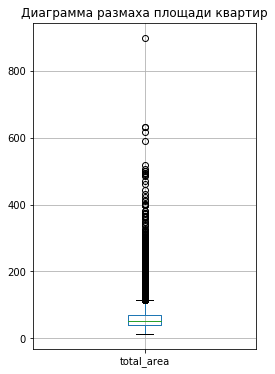

In [282]:
#Диаграмма размаха
buildBox(data_flats, 'Диаграмма размаха площади квартир', 'total_area')

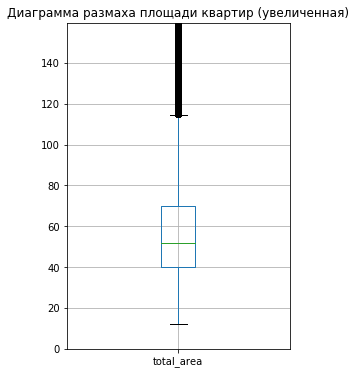

In [283]:
#Диаграмма размаха увеличенная
buildBox_detail(data_flats, 'Диаграмма размаха площади квартир (увеличенная)', 'total_area')

Нижний ус на уровне 15, верхний - 115. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию.

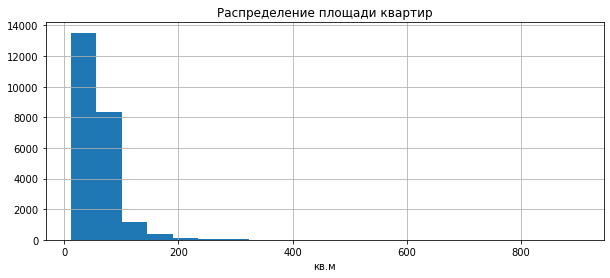

In [284]:
#Гистограмма
buildHist(data_flats.total_area, 'кв.м', 'Распределение площади квартир')

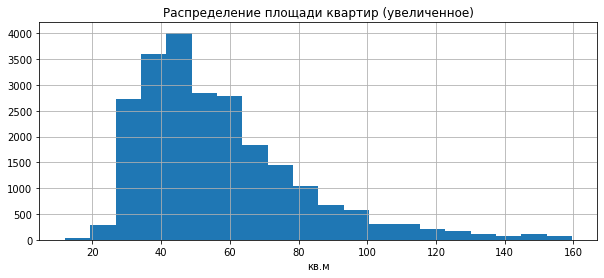

In [285]:
#Гистограмма увеличенная
buildHist_detail(data_flats.total_area, 'кв.м', 'Распределение площади квартир (увеличенное)')

На гистограмме наблюдается пик на отрезке 30 - 45, далее плавное снижение и длинный хвост на больших значениях.

Проверим количество выбросов (более 115 кв.м) - 5% выборки (достаточно много).
С точки зрения правдоподобности данных, значения 115 кв.м являются вполне реальными для Санкт-Петербурга. По моему мнению, не стоит обрезать эти данные и терять 5% выборки. 

Наблюдений, где площадь более 115 кв.м -  1217
Доля выборки 5%


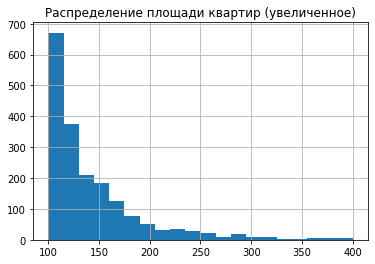

In [286]:
#Количество наблюдений, где ['total_area']>115
print("Наблюдений, где площадь более 115 кв.м - ", len(data_flats[data_flats['total_area']>115]))
#Доля выборки, где ['total_area']>115
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['total_area']>115])/len(data_flats)))

#Гистограмма увеличенная
data_flats.hist('total_area', bins=20, range=(100,400))
plt.title('Распределение площади квартир (увеличенное)')
plt.show()

Сильное снижение наблюдений после отметки 250 кв.м. Проверим сколько таких значений. 

In [287]:
#Количество наблюдений, где ['total_area']>250
print("Наблюдений, где площадь более 250 кв.м - ", len(data_flats[data_flats['total_area']>250]))
#Доля выборки, где ['total_area']>250
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['total_area']>250])/len(data_flats)))

Наблюдений, где площадь более 250 кв.м -  112
Доля выборки 0%


Уберем 112 наблюдений из хвоста, чтоб они не искажали результаты при будущем анализе. Проверим как изменились среднее и медиана.

In [288]:
#Удаление наблюдений, где ['total_area']>250
data_flats=data_flats[data_flats['total_area']<=250]
#Описательная статистика
data_flats['total_area'].describe()

count    23587.000000
mean        58.988055
std         28.894634
min         12.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        250.000000
Name: total_area, dtype: float64

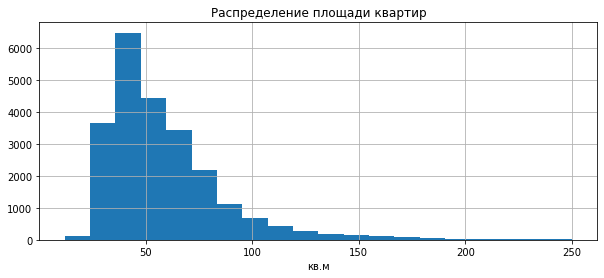

In [289]:
#Гистограмма
buildHist(data_flats.total_area, 'кв.м', 'Распределение площади квартир')

Вывод (площадь квартиры в квадратных метрах).

Среднее значение сдвинулось ближе к медиане, но не сильно. Теперь значения площали квартир от 12 до 250 кв.м. Вполне похоже на реальные данные. 

###  Анализ значений столбца "цена на момент снятия с публикации, тыс.руб."

In [290]:
#last_price — цена на момент снятия с публикации, тыс.руб.
#Описательная статистика
data_flats['last_price'].describe()

count     23587.000000
mean       6193.135019
std        7055.975463
min          12.190000
25%        3400.000000
50%        4600.000000
75%        6700.000000
max      330000.000000
Name: last_price, dtype: float64

Минимальное значение равно 12 (похоже на выброс), максимальное - 330000 (похоже на выброс). Среднее - 6193, медиана - 4600 (Сдвиг среднего в большую сторону из-за больших значений в хвосте). Ст.отклонение - 7056.

Межквартильный размах около 3300. Третий квартиль находится на уровне 6700, в то время как максимальное значение равно 330000. Такой большой разрыв связан с выбросами (которые видны на диаграмме размаха).

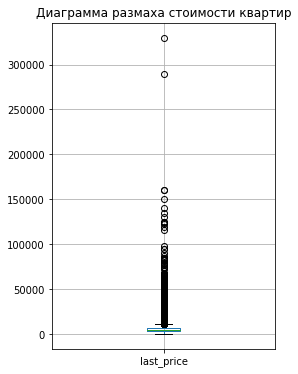

In [291]:
#Диаграмма размаха
buildBox(data_flats, 'Диаграмма размаха стоимости квартир', 'last_price')

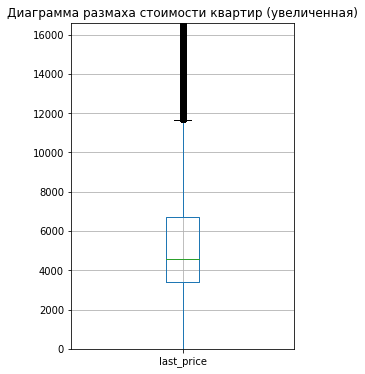

In [292]:
#Диаграмма размаха увеличенная
buildBox_detail(data_flats, 'Диаграмма размаха стоимости квартир (увеличенная)', 'last_price')

Нижний ус близок к нулю, верхний на уровне 12000. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов у нас много.

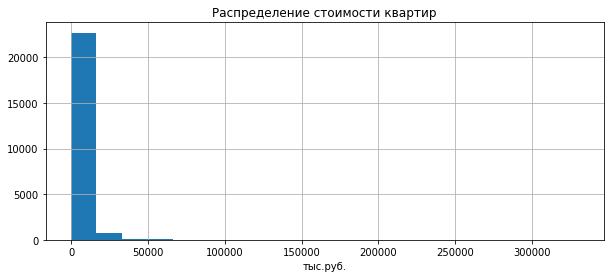

In [293]:
#Гистограмма
buildHist(data_flats.last_price, 'тыс.руб.', 'Распределение стоимости квартир')

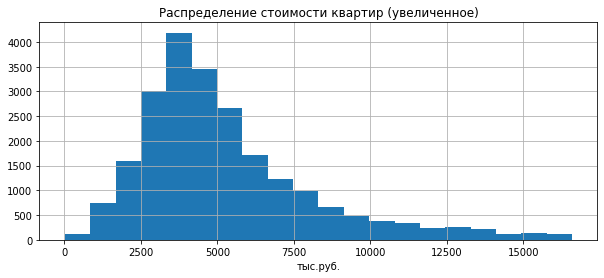

In [294]:
#Гистограмма увеличенная
buildHist_detail(data_flats.last_price, 'тыс.руб.', 'Распределение стоимости квартир (увеличенное)')

На гистограмме наблюдается пик на отрезке 3000 - 5000, далее плавное снижение и длинный хвост на больших значениях.

Проверим редкие значения и попробуем улучшить качество выборки. 

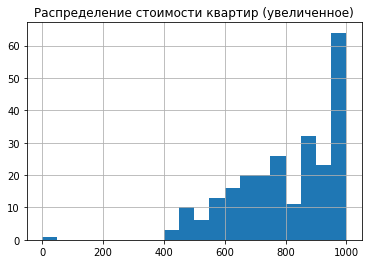

In [295]:
#Гистограмма увеличенная
data_flats.hist('last_price', range=(0, 1000), bins=20)
plt.title('Распределение стоимости квартир (увеличенное)')
plt.show()

На гистограмме видно, что есть выброс на отрезке до 200 тыс.руб. Проверим какую долю он составляет от выборки.

In [296]:
#Количество наблюдений, где ['last_price']<200
print("Наблюдений, где стоимость менее 200 тыс.руб. - ", len(data_flats[data_flats['last_price']<200]))

Наблюдений, где стоимость менее 200 тыс.руб. -  1


Однозначно, это выброс, удалим его.

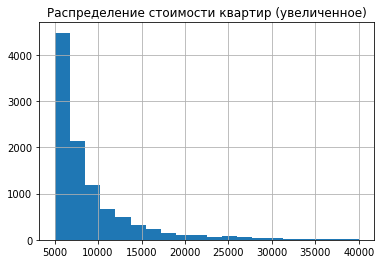

In [297]:
data_flats=data_flats[data_flats['last_price']>200]
#Гистограмма увеличенная
data_flats.hist('last_price', range=(5000, 40000), bins=20)
plt.title('Распределение стоимости квартир (увеличенное)')
plt.show()

На гистограмме видно, что самые редкие значения расположены примерно после 30 млн, проверим какую часть от выборки они составляют.

In [298]:
#Количество наблюдений, где ['last_price']>30 млн
print("Наблюдений, где стоимость более 30 млн.руб. - ", len(data_flats[data_flats['last_price']>30000]))
#Доля выборки, где ['last_price']>30 млн
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['last_price']>30000])/len(data_flats)))
data_flats=data_flats[data_flats['last_price']<=30000]

#Описательная статистика
data_flats['last_price'].describe()

Наблюдений, где стоимость более 30 млн.руб. -  235
Доля выборки 1%


count    23351.000000
mean      5718.718921
std       3982.691701
min        430.000000
25%       3400.000000
50%       4600.000000
75%       6622.500000
max      30000.000000
Name: last_price, dtype: float64

Удалили 235 крайних значения правого хвоста. Теперь стоимость квартир от 430 тыс.руб. до 30 млн. руб.

### Анализ значений столбца "число комнат"

In [299]:
#rooms - число комнат
#Описательная статистика
data_flats['rooms'].describe()

count    23351.000000
mean         2.034474
std          1.011566
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

Минимальное значение равно 0(нужно проверить что это), максимальное - 14. Среднее - 2, медиана - 2 (совпадают - это хорошо). Ст.отклонение - 1.

Межквартильный размах 2. Третий квартиль находится на уровне 3, в то время как максимальное значение равно 14. Такой большой разрыв связан с редкими большими значениями (нужно их проверить).

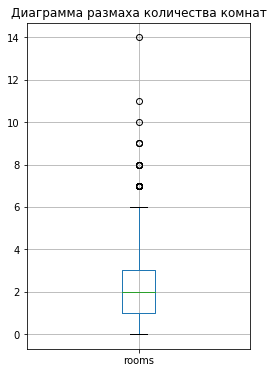

In [300]:
#Диаграмма размаха
buildBox(data_flats, 'Диаграмма размаха количества комнат', 'rooms')

Нижний ус на уровне 0, верхний около 6. Более высокие значения рисуются отдельными точками, чем больше комнат, тем меньше значений. 

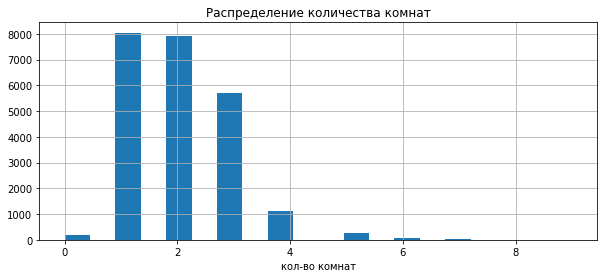

In [301]:
#Гистограмма 
buildHist_detail(data_flats.rooms, 'кол-во комнат', 'Распределение количества комнат')
plt.show()

Чаще всего встречаются однокомнатные и двухкомнатные квартиры (около 70% выборки). Трехкомнатные встречаются реже, но тоже занимают значительную часть выборки (около 23%). Четырехкомнатные - около 5% выборки, пятикомнатные около 1,5 %. Оставшуюся часть составляют более многокомнатные и нули.

Проверим редкие данные. Посчитаем долю выборки, где число комнат более 6.

In [302]:
#Количество наблюдений, где ['rooms']>6
print("Наблюдений, где кол-во комнат более 6 - ", len(data_flats[data_flats['rooms']>6]))
#Доля выборки, где ['rooms']>6
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['rooms']>6])/len(data_flats)))
data_flats=data_flats[data_flats['rooms']<=6]

Наблюдений, где кол-во комнат более 6 -  46
Доля выборки 0%


Это и вправду выбросы, их всего 46 шт. Однозначно удаляем. 

Теперь число комнат от 0 до 6. 0 комнат - это квартиры-студии.

### Анализ значений столбца "Высота потолков, м"

In [303]:
#ceiling_height - Высота потолков, м
#Описательная статистика
data_flats['ceiling_height'].describe()

count    14243.000000
mean         2.761521
std          1.268598
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение равно 1 (похоже на некорректное значение), максимальное - 100 (похоже на некорректное значение). Среднее - 2.8, медиана - 2.7 (Отличие медианы от среднего небольшое). Ст.отклонение - 1.3.

Межквартильный размах около 0.3. Третий квартиль находится на уровне 2.8, в то время как максимальное значение равно 100. Такой большой разрыв связан с выбросами(которые видны на диаграмме размаха).

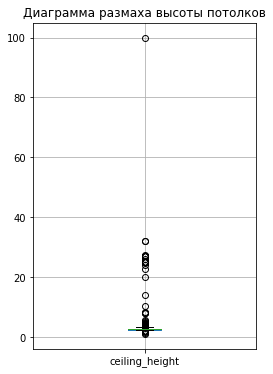

In [304]:
#Диаграмма размаха
buildBox(data_flats, 'Диаграмма размаха высоты потолков', 'ceiling_height')

Нижний ус на уровне 2.25, верхний около 3.2. Более низкие значения рисуются отдельными точками, похоже, что их немного. А более высоких много, они сливаются в единую линию, по мере увеличения высоты их количество уменьшается. 

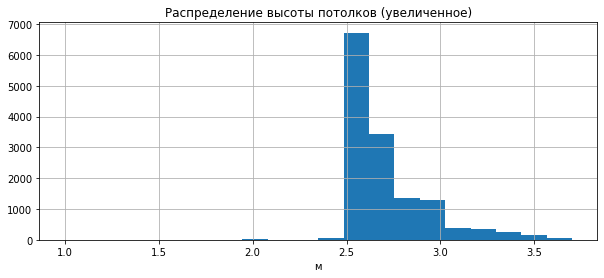

In [305]:
#Гистограмма увеличенная
buildHist_detail(data_flats.ceiling_height, 'м', 'Распределение высоты потолков (увеличенное)')

Высота 2.5 м встречается чаще всего.

Проверим редкие значения и избавимся от некорректных.

In [306]:
#Количество наблюдений, где ['ceiling_height']<=2.2
print("Наблюдений, где высота потолков менее 2.2 м - ", len(data_flats[data_flats['ceiling_height']<=2.2]))
#Доля выборки, где ['ceiling_height']<=2.2
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['ceiling_height']<=2.2])/len(data_flats)))
data_flats=data_flats[(data_flats['ceiling_height'].isnull())|(data_flats['ceiling_height']>2.2)]


Наблюдений, где высота потолков менее 2.2 м -  15
Доля выборки 0%


Наблюдений, где высота потолков не выше 2.2 м, всего 15. Такие показатели не похожи на высоту потолков в доме или квартире. Удалим их. Теперь рассмотрим слишком большие значения. 

In [307]:
#Количество наблюдений, где ['ceiling_height']>3.2
print("Наблюдений, где высота потолков менее 2.2 м - ", len(data_flats[data_flats['ceiling_height']>3.2]))
#Доля выборки, где ['ceiling_height']>3.2
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['ceiling_height']>3.2])/len(data_flats)))


Наблюдений, где высота потолков менее 2.2 м -  698
Доля выборки 3%


Значений более 3.2 метра достаточно много - 3% выборки. И в реальности высота потолков в доме вполне может достигать 4 с лишним метров. Ограничимся этим значением, и проверим количество строк, где высота потолков более 4 м.

In [308]:
#Количество наблюдений, где ['ceiling_height']>4
print("Наблюдений, где высота потолков менее 4 м - ", len(data_flats[data_flats['ceiling_height']>4]))
#Доля выборки, где ['ceiling_height']>4
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['ceiling_height']>4])/len(data_flats)))
data_flats=data_flats[(data_flats['ceiling_height'].isnull())|(data_flats['ceiling_height']<=4)]

Наблюдений, где высота потолков менее 4 м -  60
Доля выборки 0%


Удалим 60 наблюдений, где высота потолков более 4 м. Итак, в нашей отфильтрованной выборке высота потолков от 2.2 до 4 м.

### Анализ значений столбца "сколько дней было размещено объявление"

In [309]:
#days_exposition — сколько дней было размещено объявление (от публикации до снятия)

#Описательная статистика
data_flats['days_exposition'].describe()

count    20165.000000
mean       179.248946
std        217.933055
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальное значение равно 1, максимальное - 1580. Среднее значение 180, медиана 95 (Сильный сдвиг среднего в большую сторону от медианы, почти в два раза). Ст.отклонение - 218.

Межквартильный размах около 185. Третий квартиль находится на уровне 230, в то время как максимальное значение равно 1580. Такой большой разрыв связан с выбросами(которые видны на диаграмме размаха).

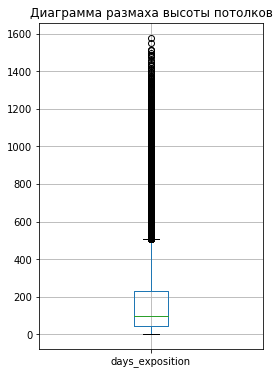

In [310]:
#Диаграмма размаха
buildBox(data_flats, 'Диаграмма размаха высоты потолков', 'days_exposition')

Нижний ус на уровне 0, верхний около 500. Более высокие значения обозначены точками, которые сливаются в единую линию.

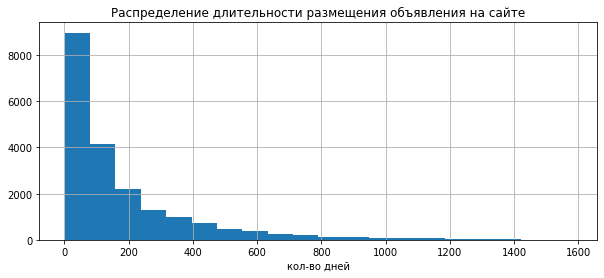

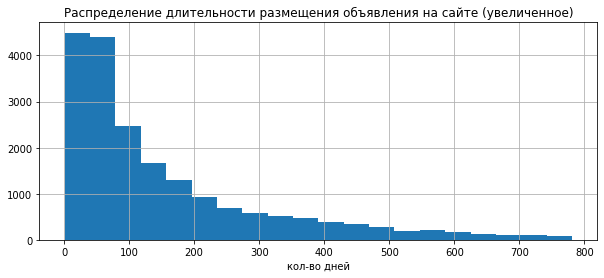

In [311]:
#Гистограмма
buildHist(data_flats.days_exposition, 'кол-во дней', 'Распределение длительности размещения объявления на сайте')
#Гистограмма увеличенная
buildHist_detail(data_flats.days_exposition, 'кол-во дней', 'Распределение длительности размещения объявления на сайте (увеличенное)')

На гистограмме распределение похоже на Пуассоновское. Самые часто встречающиеся значения расположены на отрезке от 0 до 60 дней. Затем плавный спад, длинный хвост на больших значениях.

Вывод (сколько дней было размещено объявление).
В среднем продажа квартиры занимает от 45 до 232 дней. Если продажа заняла менее 45 дней, можно отнести ее в категорию быстрых. От 232 до 500 дней отнесем в категорию затянувшихся продаж. Продажи более 500 дней скорее относятся к выбросам, чем к нормальным значениям. 

Проверим количество значений превышающих 500 дней.

In [312]:
#Количество наблюдений, где ['days_exposition']>500
print("Наблюдений, где высота потолков менее 2.2 м - ", len(data_flats[data_flats['days_exposition']>500]))
#Доля выборки, где ['days_exposition']>3.2
print('Доля выборки {:.0%}'.format(len(data_flats[data_flats['days_exposition']>500])/len(data_flats)))

Наблюдений, где высота потолков менее 2.2 м -  1685
Доля выборки 7%


7% выборки это много. Посмотрим их распределение на гистограмме.

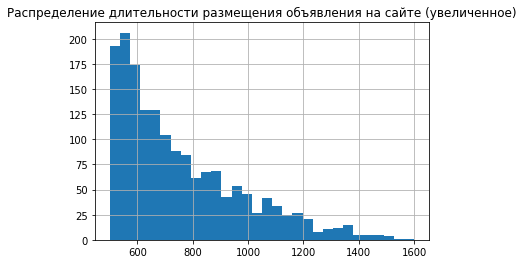

In [313]:
data_flats.hist('days_exposition', range=(500,1600), bins=30)
plt.title('Распределение длительности размещения объявления на сайте (увеличенное)')
plt.show()

На гистограмме видно равномерное снижение. Резко выбивающихся значений нет. С точки зрения правдоподобности данных, квартира могла висеть в продаже несколько лет. По моему мнению, обрезать эти значения и терять часть данных не целесообразно.

Итак, после удаления выбросов в некоторых переменных осталось 23230 наблюдений. 

Зависимость между стоимостью квартиры и другими факторами.


In [314]:
print('Матрица корреляции')
data_flats[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr().head(1)

Матрица корреляции


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.787276,0.497509,-0.34341


Самая высокая корреляция между стоимостью и площадью квартиры, 0.8. Корреляция стоимости и числа комнат 0.5. Коэффициент корреляции между стоимостью и числом комнат отрицательный, равен -0.3. Логично, чем дальше от центра квартира, тем она дешевле.

Проверим эти же зависимости, но не для стоимости квартиры, а для цены за кв.м.

In [315]:
print('Матрица корреляции')
data_flats[['price_per_m2', 'total_area', 'rooms', 'cityCenters_nearest']].corr().head(1)

Матрица корреляции


,price_per_m2,total_area,rooms,cityCenters_nearest
price_per_m2,1.0,0.141597,-0.074107,-0.383323


Коэффициент корреляции между ценой кв.м и площадью намного ниже (логично), но все таки имеется положительная зависимость. Корреляция с числом комнат близка к нулю. А вот корреляция между ценой кв.м и удаленностью от центра возросла. Да, ближе к центру кв. м недвижимости стоит дороже, не зависимо от общей площади квартиры. 

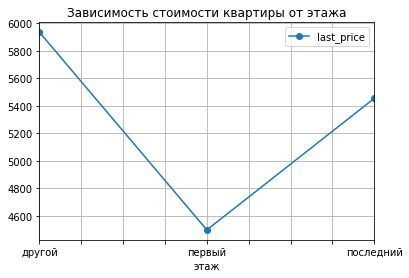

In [316]:
#Зависимость стоимости квартиры от этажа
corr_floor=data_flats.pivot_table(index='floor_group', values='last_price')
corr_floor.plot(style='o-', grid=True)
plt.title('Зависимость стоимости квартиры от этажа')
plt.xlabel('этаж')
plt.show()

Вывод.
На первом этаже стоимость квартир самая низкая. Самая высокая стоимость у квартир, расположенных между первым и последним этажом. Такие результаты выглядят правдоподобно.

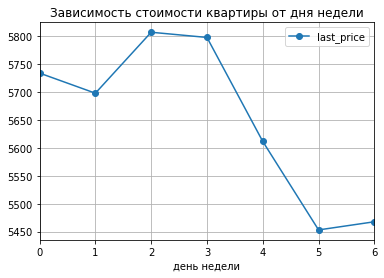

In [317]:
#Зависимость стоимости квартиры от дня недели
corr_weekday=data_flats.pivot_table(index='weekday_ad', values='last_price')
corr_weekday.plot(style='o-', grid=True)
plt.title('Зависимость стоимости квартиры от дня недели')
plt.xlabel('день недели')
plt.show()

Вывод.
Интересный факт: цена на квартиры постепенно растет с начала недели, достигает своего пика в среду и постепенно снижается. 

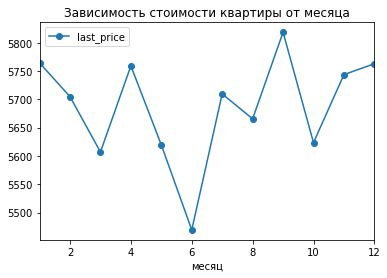

In [318]:
#Зависимость стоимости квартиры от месяца
corr_month = data_flats.pivot_table(index='month_ad', values='last_price')
corr_month.plot(style='o-')
plt.title('Зависимость стоимости квартиры от месяца')
plt.xlabel('месяц')
plt.show()

Зависимость цен от месяца сложно определить, наблюдаются сильные колебания. Можно сказать, что самая низкая стоимость наблюдается в июне. 

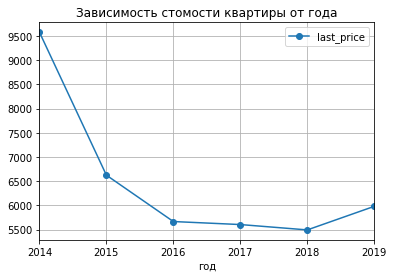

In [319]:
#Зависимость стомости квартиры от года
corr_year = data_flats.pivot_table(index='year_ad', values='last_price')
corr_year.plot(style='o-', grid=True)
plt.title('Зависимость стомости квартиры от года')
plt.xlabel('год')
plt.show()

Интересный факт: с 2014 по 2018 средняя цена квартиры падает. Самый резкий спад был в 2015 - 24% по сравнению с 2014 годом. В 2019 выросла на 8% по сравнению с предыдущим годом. 

### 10 населенных пунктов с наибольшим числом объявлений

In [320]:
#10 населенных пунктов с наибольшим числом объявлений

data_l=data_flats.groupby('locality_name').agg({'price_per_m2':['count','mean']})
data_l.columns=['count_ad','price_per_m']
data_l=data_l.sort_values(by='count_ad', ascending=False).head(10)
data_l=data_l.sort_values(by='price_per_m', ascending=False)
data_l

,count_ad,price_per_m
locality_name,,
Санкт-Петербург,15285,110.568924
Пушкин,366,103.060109
деревня Кудрово,299,92.508361
посёлок Парголово,326,90.297546
посёлок Мурино,520,85.705769
посёлок Шушары,440,78.700000
Колпино,337,75.338279
Гатчина,306,68.761438
Всеволожск,396,68.661616


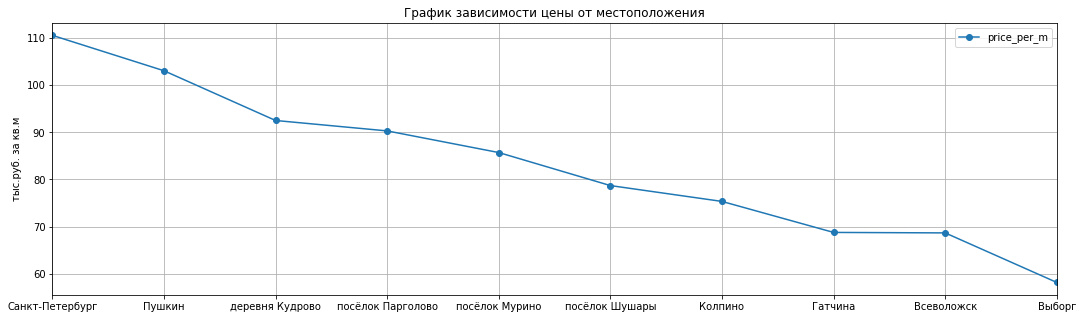

In [321]:
#График зависимости цены от местоположения
data_l.plot(y='price_per_m', figsize=(18,5), style='o-', grid=True)
plt.title('График зависимости цены от местоположения')
plt.ylabel('тыс.руб. за кв.м')
plt.xlabel('')
plt.show()

Самая высокая стоимость жилья в Санкт-Петербурге (ожидаемо) - 109 тыс.руб. за кв.м, на втором месте Пушкин. Самая низкая стоимость жилья из десяти самых популярных населенных пунктов в Выборге - 58 тыс.руб. за кв.м.

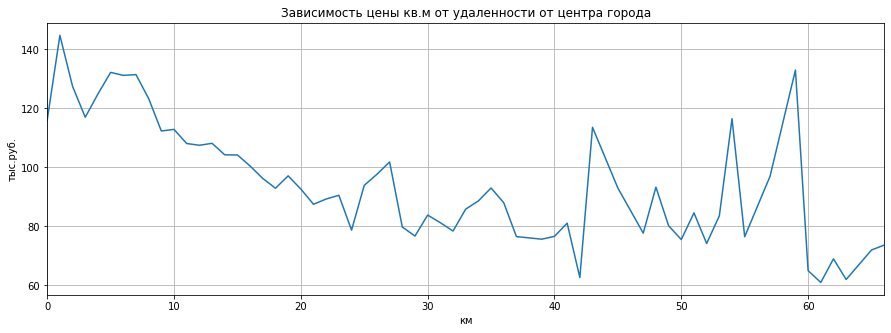

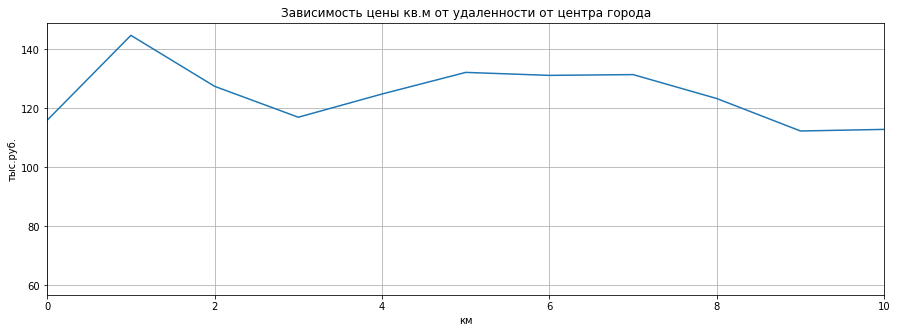

In [322]:
#Выборка для квартир в Санкт-Петербурге
data_Piter=data_flats[data_flats['locality_name']=='Санкт-Петербург']
#Средняя цена для каждого километра
data_Piter_1=data_flats.groupby('cityCenters_nearest')['price_per_m2'].mean()
data_Piter_1.plot(figsize=(15,5), grid=True)
plt.title('Зависимость цены кв.м от удаленности от центра города')
plt.xlabel('км')
plt.ylabel('тыс.руб.')
plt.show()

data_Piter_1.plot(figsize=(15,5), grid=True, xlim=(0,10))
plt.title('Зависимость цены кв.м от удаленности от центра города')
plt.xlabel('км')
plt.ylabel('тыс.руб.')
plt.show()

В левой части графика (от 1 до 3 км) общий тренд нисходящий. От 0 до 1 км наблюдается аномалия. Это может быть связано с тем, что данные об удаленности от центра неверные (намеренно заниженные), либо некорректно указана цена (намеренно занижена). Так же причина может быть в особенностях исторической застройки города, возможно в самом центре расположен более старый жилой фонд. Мы эти данные отнесем к центру города, не смотря на аномалию. Чем дальше недвижимость удалена от центра города, тем дешевле кв.м. Однако после отметки в 3 км аномалии становятся более частыми и резкими. Уже не наблюдается обратная зависимость между двумя показателями. Причиной может служить то, что цена уже напрямую не зависит от удаленности от центра, появляются различные районы и новые жилые комплексы. Таким образом, под центральной частью города я бы выделила интервал от 0 до 3 км.   

In [323]:
#Сегмент квартир в центре города (не более 3 км от центра)
data_Piter_center=data_Piter[data_Piter['cityCenters_nearest']<=3]
data_Piter_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 24 to 23648
Data columns (total 29 columns):
total_images            775 non-null int64
last_price              775 non-null float64
total_area              775 non-null float64
first_day_exposition    775 non-null datetime64[ns]
rooms                   775 non-null int64
ceiling_height          538 non-null float64
floors_total            773 non-null float64
living_area             775 non-null float64
floor                   775 non-null int64
is_apartment            775 non-null bool
studio                  775 non-null bool
open_plan               775 non-null bool
kitchen_area            775 non-null float64
balcony                 775 non-null int64
locality_name           775 non-null object
airports_nearest        775 non-null float64
cityCenters_nearest     775 non-null float64
parks_around3000        775 non-null int64
parks_nearest           598 non-null float64
ponds_around3000        775 non-null int64
ponds_n

Итак, квартир в центре города оказалось 775, что составляет 5% от выборки по Санкт-Петербургу.

In [324]:
#Средняя площадь кварты в центре
print('Средняя площадь кварты в центре', data_Piter_center['total_area'].mean())
print('Средняя площадь кварты', data_flats['total_area'].mean())

Средняя площадь кварты в центре 86.30802580645161
Средняя площадь кварты 57.66428153250108


Средняя площадь квартиры в центре выше более, чем на 28 кв.м. Это большая разница (повышение на 50%).

In [325]:
#Средняя стоимость кв.м в центре
print('Средняя стоимость кв.м в центре', data_Piter_center['price_per_m2'].mean())
print('Средняя стоимость кв.м в', data_flats['price_per_m2'].mean())

Средняя стоимость кв.м в центре 126.55612903225807
Средняя стоимость кв.м в 96.36521739130434


Средняя стоимость квадратного метра в центре города выше на 30 тыс.руб. - ожидаемо (повышение на 31%).

In [326]:
#Среднее число комнат в центре
print('Среднее число комнат в центре', data_Piter_center['rooms'].mean())
print('Среднее число комнат', data_flats['rooms'].mean())

Среднее число комнат в центре 2.898064516129032
Среднее число комнат 2.0234610417563497


Среднее число комнат увеличилось на 1 (повышение на 44%).

In [327]:
#Средняя высота потолков в центре
print('Средняя высота потолков в центре', data_Piter_center['ceiling_height'].mean())
print('Средняя высота потолков', data_flats['ceiling_height'].mean())

Средняя высота потолков в центре 3.1761338289962824
Средняя высота потолков 2.7128627893845283


Средняя высота потолков выше - на 0.5 м. Это ощутимая разница (повышение на 17%).

Итак, среднее значение всех четырех показателей оказалось выше для квартир в центре города. Квартиры в центре значительно дороже и просторнее.

(РЕЗУЛЬТАТЫ ДЛЯ ВСЕЙ ВЫБОРКИ)
Корреляция между стоимостью квартиры и сл.параметрами:
- *Площадь квартиры* -  0.77
- *Число комнат* -  0.5
- *Удаленность от центра* -  -0.36

In [328]:
print('Матрица корреляции для центра города')
data_Piter_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr().head(1)

Матрица корреляции для центра города


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.652843,0.409632,-0.152563


Коэффициент корреляции во всех трех случаях снизился по модулю. Во-первых, это может быть связано с размерностью выборки. Чем меньше объем данных, тем сложнее выявить зависимости между показателями. Во-вторых, в центре города влияние данных факторов на стоимость квартиры снижается, возрастает роль других переменных. Если квартира просторная, с большим количеством комнат, дополнительные метры уже не будут играть большую роль при формировании цены. Так же и параметр удаленности от центра подвергается закону убывающей отдачи. Уже не важно, будет квартира расположена в 1 км от центра или в 2 км. Корреляция этого параметра с ценой вообще в этом случае стремится к нулю. Это логично, ведь мы ограничили выборку именно по этому параметру (всего до 3 км). 

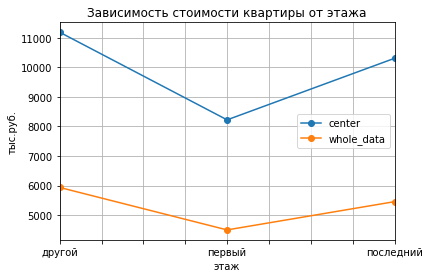

In [329]:
#Зависимость цены квартиры от этажа
corr_floor_center = data_Piter_center.pivot_table(index='floor_group', values='last_price')
corr_floor_center['whole_data']=corr_floor['last_price']
corr_floor_center.columns=['center','whole_data']
corr_floor_center.plot(style='o-', grid=True)
plt.title('Зависимость стоимости квартиры от этажа')
plt.xlabel('этаж')
plt.ylabel('тыс.руб.')
plt.show()



Влияние этажа на стоимость квартиры увеличивается в центре города. Первый этаж по прежнему остается самым дешевым, на втором месте последний этаж. Разница между первым и другими утажами выросла. Возможно, график становится менее сглаженным из-за сильного снижения количества данных (это видно и на сл.графиках).

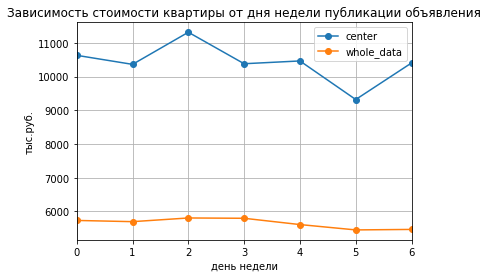

In [330]:
#Зависимость цены квартиры от дня недели
corr_weekday_center = data_Piter_center.pivot_table(index='weekday_ad', values='last_price')
corr_weekday_center['whole_data']=corr_weekday['last_price']
corr_weekday_center.columns=['center','whole_data']
corr_weekday_center.plot(style='o-', grid=True)
plt.title('Зависимость стоимости квартиры от дня недели публикации объявления')
plt.xlabel('день недели')
plt.ylabel('тыс.руб.')
plt.show()

Общий тренд не изменился. Своего пика цены достигают в среду, самый большой спад в субботу. Но перепады стали более резкими, разрыв между минимальной и максимальной ценой значительно больше. 

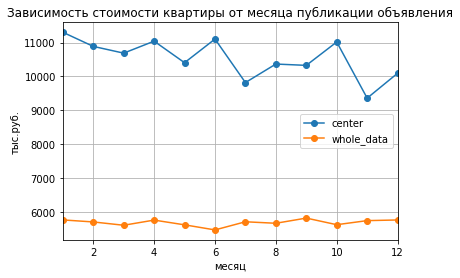

In [331]:
#Зависимость цены квартиры в ЦЕНТРЕ города от месяца
corr_month_center = data_Piter_center.pivot_table(index='month_ad', values='last_price')
corr_month_center['whole_data']=corr_month['last_price']
corr_month_center.columns=['center','whole_data']
corr_month_center.plot(style='o-', grid=True)
plt.title('Зависимость стоимости квартиры от месяца публикации объявления')
plt.xlabel('месяц')
plt.ylabel('тыс.руб.')
plt.show()

Общий вид графика не сохраняется. Но по-прежнему сложно отследить зависимость.


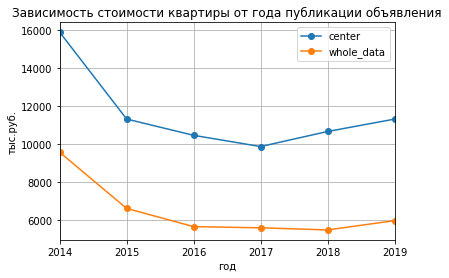

In [332]:
#Зависимость цены квартиры в ЦЕНТРЕ города от года
corr_year_center = data_Piter_center.pivot_table(index='year_ad', values='last_price')
corr_year_center['whole_data']=corr_year['last_price']
corr_year_center.columns=['center','whole_data']
corr_year_center.plot(style='o-', grid=True)
plt.title('Зависимость стоимости квартиры от года публикации объявления')
plt.xlabel('год')
plt.ylabel('тыс.руб.')
plt.show()

Общий вид графиков очень похож, однако рост цен начинается не с 2019 года, а с 2018. 

Итак, большинство трендов сохраняется для квартир в центре города. Однако, графики становятся более резкими, то есть влияние таких факторов как этаж и день недели публикации объявления играют более ощутимую роль. Однако, это может быть связано с уменьшением объема выборки, которое приводит к снижению сглаженности графиков. Более того, видно, что цены на квартиры в центре начали расти на год раньше. 

### Шаг 5. Общий вывод

Изначально в выборке было 23698 наблюдений.
В 14 из 22 столбцов присутствовали пропущенные значения. В трех переменных (число балконов, число водоемов поблизости, число парков поблизости) пропуски были заменены на 0. В двух столбцах (площади кухни, площадь жилой площади) пропуски были заполнены рассчетными значениями.
В 6 переменных был изменен тип данных на более корректный.
В двух переменных (цена квартиры, расстояние до центра) были изменены единицы измерения для более удобного последующего анализа.
Далее в таблицу были добавлены 7 новых столбцов.
Были изучены следующие параметры: площадь, цена, число комнат, высота потолков, время продажи. Из некоторых из них были удалены выбросы, несущие риск искажения результатов анализа. После этого осталось 23230 наблюдений. 

На отфильтрованных данных была рассмотрена зависимость между стоимостью квартиры и другими факторами. 
Взаимозависимость между стоимость и такими переменными как площадь квартиры, число комнат, удаленность от центра, подтвердилась. 
Принадлежность к первому и последнему этажу показали снижение средней стоимости.
Самая высокая стоимость продажи оказалась у объявлений, размещенных в середине недели.
Явную зависимость между ценой продажи и месяцем размещения объявления отследить не удалось.
С 2014 по 2018 год наблюдался спад цен на недвижимость, в 2019 году цены начали расти по сравнению с предыдущим годом.

Далее было выбрано 10 населенных пунктов с наибольшим количеством наблюдений. Среди них самая высокая стоимость жилья в Санкт-Петербурге, самая низкая - в Выборге.

Затем были отфильтрованы только квартиры, расположенные в Санкт-Петербурге. На основе графика взаимозависимости цены продажи и удаленности от центра города, был выделен сегмент квартир в центре. Была сформирована новая выборка - квартиры в центре Санкт-Петербурга (775 наблюдений). Была рассмотрена разница между средними показателями некоторых переменных (площадь, цена, число комнат, высота потолков) для первоначальной и новой выборки. Все рассмотренные значения показали сильное увеличение. Средняя площадь выросла аж на 50%, цена кв.м - на 31%, среднее количество комнат увеличилось на 1, а высота потолков - на 0.5 м. Общие тренды зависимости стоимости от этажа и дня недели публикации объявления сохранились. Так же было ообнаружено, что цены на квартры в центре города начали расти на год раньше. 

Таким образом, основные гипотезы зависимости цены квартир от других параметров подтвердились. На примере ограничения выборки, было показано, что средние значения разных переменных сильно зависят от местоположения недвижимости. 

Был выявлен ряд критерив (таких как площадь, высота потолков, цена, количество комнат) для отнесения объявлений в разряд "подозрительных" для повторной проверки. 

